In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citypy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

651

In [6]:
# Import the requests library.
import requests

# Import the API Key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eae283ab1f5578df1cbfd6dfc98ead41


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
    # log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

Processing Record 1 of Set 14 | mahebourg
Processing Record 2 of Set 14 | mahebourg
Processing Record 3 of Set 14 | mahebourg
Processing Record 4 of Set 14 | mahebourg
Processing Record 5 of Set 14 | mahebourg
Processing Record 6 of Set 14 | mahebourg
Processing Record 7 of Set 14 | mahebourg
Processing Record 8 of Set 14 | mahebourg
Processing Record 9 of Set 14 | mahebourg
Processing Record 10 of Set 14 | mahebourg
Processing Record 11 of Set 14 | mahebourg
Processing Record 12 of Set 14 | mahebourg
Processing Record 13 of Set 14 | mahebourg
Processing Record 14 of Set 14 | mahebourg
Processing Record 15 of Set 14 | mahebourg
Processing Record 16 of Set 14 | mahebourg
Processing Record 17 of Set 14 | mahebourg
Processing Record 18 of Set 14 | mahebourg
Processing Record 19 of Set 14 | mahebourg
Processing Record 20 of Set 14 | mahebourg
Processing Record 21 of Set 14 | mahebourg
Processing Record 22 of Set 14 | mahebourg
Processing Record 23 of Set 14 | mahebourg
Processing Record 24

In [14]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    

Processing Record 2 of Set 53 | mgandu
Processing Record 3 of Set 53 | puerto ayora
Processing Record 4 of Set 53 | busselton
Processing Record 5 of Set 53 | jamestown
Processing Record 6 of Set 53 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 53 | ushuaia
Processing Record 8 of Set 53 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 53 | qaanaaq
Processing Record 10 of Set 53 | bluff
Processing Record 11 of Set 53 | yenagoa
Processing Record 12 of Set 53 | lompoc
Processing Record 13 of Set 53 | mau aima
City not found. Skipping...
Processing Record 14 of Set 53 | trat
Processing Record 15 of Set 53 | rikitea
Processing Record 16 of Set 53 | mount isa
Processing Record 17 of Set 53 | lorengau
Processing Record 18 of Set 53 | monterotondo
Processing Record 19 of Set 53 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 53 | zhigansk
Processing Record 21 of Set 53 | saint-philippe
Processing Record 22 of Set 53 | punta

Processing Record 34 of Set 56 | hithadhoo
Processing Record 35 of Set 56 | tambopata
Processing Record 36 of Set 56 | ribeira grande
Processing Record 37 of Set 56 | batemans bay
Processing Record 38 of Set 56 | visby
Processing Record 39 of Set 56 | gangotri
City not found. Skipping...
Processing Record 40 of Set 56 | nedjo
Processing Record 41 of Set 56 | isangel
Processing Record 42 of Set 56 | cidreira
Processing Record 43 of Set 56 | port macquarie
Processing Record 44 of Set 56 | kalevala
Processing Record 45 of Set 56 | pontianak
Processing Record 46 of Set 56 | high level
Processing Record 47 of Set 56 | formia
Processing Record 48 of Set 56 | izhma
Processing Record 49 of Set 56 | iqaluit
Processing Record 50 of Set 56 | cabedelo
Processing Record 1 of Set 57 | caraballeda
Processing Record 2 of Set 57 | hamilton
Processing Record 3 of Set 57 | namanga
Processing Record 4 of Set 57 | sarny
Processing Record 5 of Set 57 | camacha
Processing Record 6 of Set 57 | san pedro
Proce

Processing Record 17 of Set 60 | coihaique
Processing Record 18 of Set 60 | wajima
Processing Record 19 of Set 60 | westport
Processing Record 20 of Set 60 | crossville
Processing Record 21 of Set 60 | saint augustine
Processing Record 22 of Set 60 | polovinnoye
Processing Record 23 of Set 60 | sao bras de alportel
Processing Record 24 of Set 60 | guhagar
Processing Record 25 of Set 60 | fortuna
Processing Record 26 of Set 60 | vao
Processing Record 27 of Set 60 | homer
Processing Record 28 of Set 60 | adrar
Processing Record 29 of Set 60 | north bay
Processing Record 30 of Set 60 | castelo do piaui
Processing Record 31 of Set 60 | yangjiang
Processing Record 32 of Set 60 | hammerfest
Processing Record 33 of Set 60 | tiarei
Processing Record 34 of Set 60 | gat
Processing Record 35 of Set 60 | chakrata
Processing Record 36 of Set 60 | vinh long
Processing Record 37 of Set 60 | rosario oeste
Processing Record 38 of Set 60 | bodden town
Processing Record 39 of Set 60 | tucuma
Processing R

Processing Record 1 of Set 64 | eenhana
Processing Record 2 of Set 64 | tampilisan
Processing Record 3 of Set 64 | high rock
Processing Record 4 of Set 64 | mehrabpur
Processing Record 5 of Set 64 | yulara
Processing Record 6 of Set 64 | zhangye
Processing Record 7 of Set 64 | jahrom
City not found. Skipping...
Processing Record 8 of Set 64 | agirish
Processing Record 9 of Set 64 | sorong
Processing Record 10 of Set 64 | novyy urengoy
Processing Record 11 of Set 64 | mayo
Processing Record 12 of Set 64 | la ronge
Processing Record 13 of Set 64 | bonthe
Processing Record 14 of Set 64 | yarmouth
Processing Record 15 of Set 64 | zyryanka
Processing Record 16 of Set 64 | khandbari
Processing Record 17 of Set 64 | jalu
Processing Record 18 of Set 64 | matamoros
Processing Record 19 of Set 64 | sao francisco
Processing Record 20 of Set 64 | pyaozerskiy
Processing Record 21 of Set 64 | meulaboh
Processing Record 22 of Set 64 | mallaig
Processing Record 23 of Set 64 | vallenar
Processing Recor

In [16]:
len(city_data)

597

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mgandu,-5.9500,34.1333,56.62,81,38,6.80,TZ,2021-05-27 02:53:33
1,Puerto Ayora,-0.7393,-90.3518,74.55,92,58,5.99,EC,2021-05-27 02:53:33
2,Busselton,-33.6500,115.3333,62.04,63,100,18.07,AU,2021-05-27 02:53:34
3,Jamestown,42.0970,-79.2353,63.72,83,40,1.01,US,2021-05-27 02:52:12
4,Ushuaia,-54.8000,-68.3000,29.86,86,75,18.41,AR,2021-05-27 02:51:28
5,Qaanaaq,77.4840,-69.3632,29.43,75,0,5.10,GL,2021-05-27 02:53:35
6,Bluff,-46.6000,168.3333,49.80,70,100,10.33,NZ,2021-05-27 02:53:35
7,Yenagoa,4.9247,6.2642,77.07,94,100,3.56,NG,2021-05-27 02:49:18
8,Lompoc,34.6391,-120.4579,67.37,77,75,10.36,US,2021-05-27 02:53:36
9,Trat,12.5000,102.5000,86.79,80,95,5.19,TH,2021-05-27 02:53:37


In [19]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mgandu,TZ,2021-05-27 02:53:33,-5.9500,34.1333,56.62,81,38,6.80
1,Puerto Ayora,EC,2021-05-27 02:53:33,-0.7393,-90.3518,74.55,92,58,5.99
2,Busselton,AU,2021-05-27 02:53:34,-33.6500,115.3333,62.04,63,100,18.07
3,Jamestown,US,2021-05-27 02:52:12,42.0970,-79.2353,63.72,83,40,1.01
4,Ushuaia,AR,2021-05-27 02:51:28,-54.8000,-68.3000,29.86,86,75,18.41
5,Qaanaaq,GL,2021-05-27 02:53:35,77.4840,-69.3632,29.43,75,0,5.10
6,Bluff,NZ,2021-05-27 02:53:35,-46.6000,168.3333,49.80,70,100,10.33
7,Yenagoa,NG,2021-05-27 02:49:18,4.9247,6.2642,77.07,94,100,3.56
8,Lompoc,US,2021-05-27 02:53:36,34.6391,-120.4579,67.37,77,75,10.36
9,Trat,TH,2021-05-27 02:53:37,12.5000,102.5000,86.79,80,95,5.19


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [ ]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


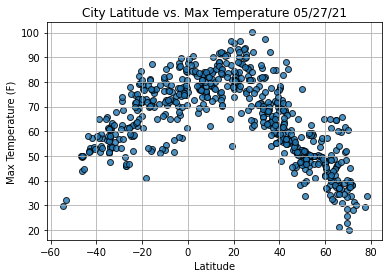

In [27]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

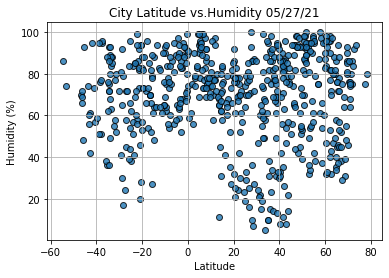

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs.Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

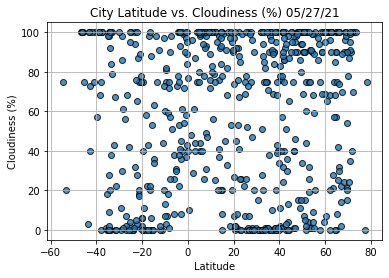

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

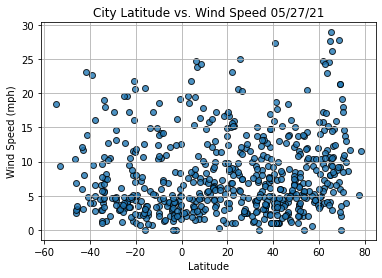

In [29]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()